In [1]:
import numpy as np 
import pandas as pd

## Problem 1
## Part 1, 2

<img src="Part1.png">
<img src="Part2_1.png">
<img src="Part2_2.png">

## Part 3

In [2]:
# Define softmax and ReLu
relu = np.vectorize(lambda z: np.fmax(0,z))
softmax = lambda x: np.exp(x)/(np.exp(x).sum(axis=0, keepdims=True))
def predict(y):
    return np.argmax(y,axis=0)

In [3]:
def ff_nn_2_ReLu(x,W1,W2,W3,b1,b2,b3):
    a_1 = np.dot(W1,x) + b1
    h1 = relu(a_1)
    a_2 = np.dot(W2,h1) + b2
    h2 = relu(a_2)
    h2
    a_3 = np.dot(W3,h2) + b3
    y = softmax(a_3)
    return y

## Part 4

In [4]:
x = np.array([[1,0,0],[-1,-1,1]])
W1 = np.array([[1,0],[-1,0],[0,.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
W3 = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
b3 = np.array([[1],[0],[0]])
y = ff_nn_2_ReLu(x,W1,W2,W3,b1,b2,b3)
y

array([[0.94649912, 0.84379473, 0.84379473],
       [0.04712342, 0.1141952 , 0.1141952 ],
       [0.00637746, 0.04201007, 0.04201007]])

For each $x_i$, the probability of $x_i$ in class j is $(i,j)^{th}$ term of the matrix. For 1 $\leq$ i $\leq$ n, 1$\leq$ j $\leq$ m, where n is number of samples (number of columns in x) and m is number of classes (assuming index starts at 1). Hence, for this input, all $x_1,x_2,x_3$ will be calssified in class 1 (assuming index starts at 0)

## Problem 2
## Part 1

$\frac{\delta f(x,y)}{\delta x}$ = $-2(1-x) + 200(y-x^2)(-2x) = 2x-2 -400x(y-x^2) = 2x - 2 - 400(xy-x^3)$ <br>
$\frac{\delta f(x,y)}{\delta y}$ = $2*100(y-x^2)=200(y-x^2)$

## Part 2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# --- Paraboloid Function ---
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)


In [6]:
# --- Setting up gradient ---
def grad_f(vector):
    x, y = vector
    df_dx = 2*x - 2 - 400*(x*y-x**3)
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=10, learning_rate=6):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,5,size=2)
        print('Initial point is',point)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    print('After iterations, the point is ',point)
    return np.array(trajectory)



Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [nan nan]


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


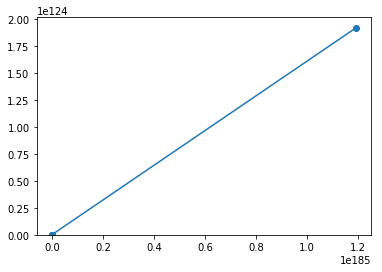

In [7]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50,learning_rate=10)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [nan nan]


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


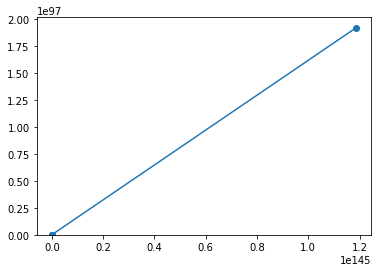

In [8]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50,learning_rate=1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [ 0.00513221 -1.65101579]


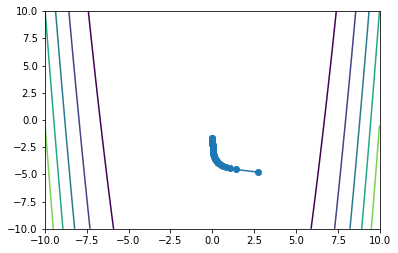

In [9]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50,learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

This function is not convex and the minimum point is at (-1,-1). When the learning rate is large, the trajectories diverage. Large learning rates will skip the optimal point. On the other hand, when learning rate is small, it becomes more stable (this can be seen from the last trajectory). Here, small learning rate takes each step smaller and it will not skip the optimal point, but it requires more iterations to find the optimal point. Hence, choosing a right learning rate (tuning parameter) is important 

## Part 4
## Gradient Descent with Momentum algorithm

In [10]:
# --- Gradient with momentum ---
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-5,5,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    print('Initial point is',point)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    print('After iterations, the point is ',point)
    return np.array(trajectory)

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [nan nan]


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


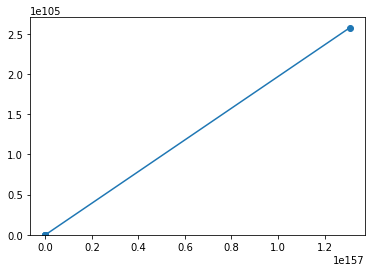

In [11]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=2, alpha=.7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [nan nan]


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


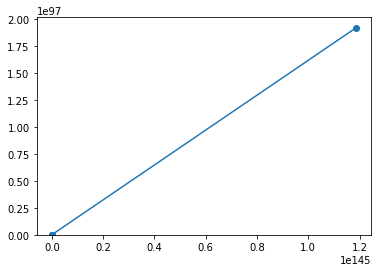

In [12]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=1, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [0.28519766 0.07826446]


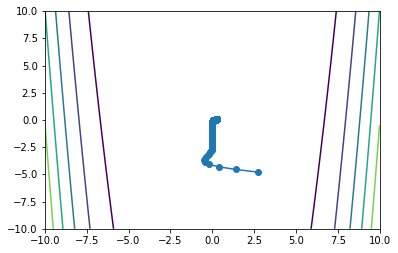

In [13]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.0001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

From all trajectories above, we can see epsilon is similar to learning rate in part c. Larger epsilon makes the algorithm skip the optimal point and diverage. On the other hand, small epsilon makes it more stable but takes more iterations to reach optimal point. For example, in the last plot, initial point is (2.71,-4.79) and it moves toward optimal point. After 1000 iterations, it ends at (0.285,0.0783). Next, I will try a smaller epsilon and see how it performs. 

Initial point is [ 2.71320643 -4.79248051]
After iterations, the point is  [ 0.01632369 -0.08119181]


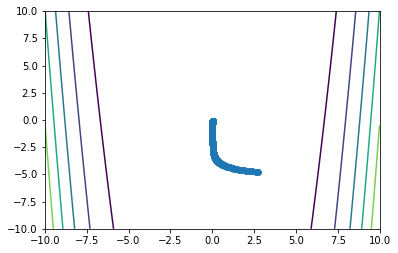

In [14]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.00001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In the plot above, I changed epsilon 10 times smaller. Initial points were the same, but the second one moved slower than the first one. 

# Problem 3
## Part 1

Let $x_i$ be i$^{th}$ input for $x_1, x_2$, $\dots$, $x_n$ and $x_i$ is a 2D vector (2 $\times$ 1), $W_1$ be the first weight matrix

$$W_1 = \begin{bmatrix}w_{111}&w_{121}\\w_{112}&w_{122}\\w_{113}&w_{123}\end{bmatrix}$$. 

$W_2$ be the second weight matrix

$$W_2 = \begin{bmatrix}w_{211}&w_{221}&w_{231}\\w_{212}&w_{222}&w_{232}\end{bmatrix}$$. 

$W_3$ be the third weight matrix

$$W_3 = \begin{bmatrix}w_{311}&w_{321}\\w_{312}&w_{322}\\w_{313}&w_{323}\end{bmatrix}$$. 

Then, with loss function<br>
$$\boldsymbol{z_1} = w_1 \boldsymbol{x} + \boldsymbol{b_1}, \boldsymbol{h_1} = f(\boldsymbol{z_1})$$ <br>
$$\boldsymbol{z_2} = w_2 \boldsymbol{h_1} + \boldsymbol{b_2}, \boldsymbol{h_2} = f(\boldsymbol{z_2})$$<br>
$$\boldsymbol{a} = w_3 \boldsymbol{h_2} + \boldsymbol{b_3}, \boldsymbol{\hat y} = g(\boldsymbol{a})$$
$$L(\boldsymbol{y},\boldsymbol{\hat y}) = y_1 log(\hat y_1)+y_2 log(\hat y_2)+y_3 log(\hat y_3)$$ <br> 
where f and g are Relu and softmax function respectively. <br>
Take gradient with respect to each parameters, we have<br>
$$\frac{\delta L}{\boldsymbol{\delta a}} = \frac{\delta L}{\delta  \boldsymbol{\hat y}} \frac{\delta  \boldsymbol{\hat y}}{\delta \boldsymbol{a}} =  \boldsymbol{\hat y}-\boldsymbol{y}$$

$$\frac{\delta L}{\delta  \boldsymbol{b_3}} = \frac{\delta L}{\boldsymbol{\delta a}} \frac{\boldsymbol{\delta a}}{\delta  \boldsymbol{b_3}} = (\boldsymbol{\hat y}-\boldsymbol{y}) $$

$$\frac{\delta L}{\delta  \boldsymbol{w_3}} = \frac{\delta L}{\boldsymbol{\delta a}} \frac{\boldsymbol{\delta a}}{\delta  \boldsymbol{w_3}} = (\boldsymbol{\hat y}-\boldsymbol{y})\boldsymbol{h_2} $$

$$\frac{\delta L}{\delta  \boldsymbol{b_2}} = \frac{\delta L}{\boldsymbol{\delta a}} \frac{\boldsymbol{\delta a}}{\delta  \boldsymbol{h_2}} \frac{\delta  \boldsymbol{h_2}}{\delta  \boldsymbol{z_2}}\frac{\delta  \boldsymbol{z_2}}{\delta  \boldsymbol{b_2}} = (\boldsymbol{\hat y}-\boldsymbol{y})*\boldsymbol{w_3} * \mathbb{1}(\boldsymbol{z_2}>0)*1$$

$$\frac{\delta L}{\delta  \boldsymbol{w_2}} = \frac{\delta L}{\boldsymbol{\delta a}} \frac{\boldsymbol{\delta a}}{\delta  \boldsymbol{h_2}} \frac{\delta  \boldsymbol{h_2}}{\delta  \boldsymbol{z_2}}\frac{\delta  \boldsymbol{z_2}}{\delta  \boldsymbol{w_2}} = (\boldsymbol{\hat y}-\boldsymbol{y})*\boldsymbol{w_3} * \mathbb{1}(\boldsymbol{z_2}>0)*\boldsymbol{h_1}$$

$$\frac{\delta L}{\delta  \boldsymbol{b_1}} = \frac{\delta L}{\boldsymbol{\delta a}} \frac{\boldsymbol{\delta a}}{\delta  \boldsymbol{h_2}} \frac{\delta  \boldsymbol{h_2}}{\delta  \boldsymbol{z_2}}\frac{\delta  \boldsymbol{z_2}}{\delta  \boldsymbol{h_1}} \frac{\delta  \boldsymbol{h_1}}{\delta  \boldsymbol{z_1}} \frac{\delta  \boldsymbol{z_1}}{\delta  \boldsymbol{b_1}}= (\boldsymbol{\hat y}-\boldsymbol{y})*\boldsymbol{w_3} * \mathbb{1}(\boldsymbol{z_2}>0)*\boldsymbol{w_2}*\mathbb{1}(\boldsymbol{z_1}>0) *1$$

$$\frac{\delta L}{\delta  \boldsymbol{w_1}} = \frac{\delta L}{\boldsymbol{\delta a}} \frac{\boldsymbol{\delta a}}{\delta  \boldsymbol{h_2}} \frac{\delta  \boldsymbol{h_2}}{\delta  \boldsymbol{z_2}}\frac{\delta  \boldsymbol{z_2}}{\delta  \boldsymbol{h_1}} \frac{\delta  \boldsymbol{h_1}}{\delta  \boldsymbol{z_1}} \frac{\delta  \boldsymbol{z_1}}{\delta  \boldsymbol{w_1}}= (\boldsymbol{\hat y}-\boldsymbol{y})*\boldsymbol{w_3} * \mathbb{1}(\boldsymbol{z_2}>0)*\boldsymbol{w_2}*\mathbb{1}(\boldsymbol{z_1}>0) *\boldsymbol{x} $$



## Part 2

In [15]:
def grad_f(X,H1,H2,Y,Y_hat,parameters):  
    # Unpacking parameters    
    W1,b1,W2,b2,W3,b3 = parameters
    # Gradients - ReLU
    
    
    dW3 = np.dot((Y_hat - Y).T,H2)
    db3 = np.reshape((Y_hat - Y).sum(axis=0),(3,1))
    db2 = np.reshape((np.dot((Y_hat - Y),W3)* (H2 > 0)).sum(axis = 0),(2,1))
    dW2 = np.dot((np.dot((Y_hat - Y),W3)* (H2 > 0)).T,H1)
    db1 = np.reshape(np.sum(np.dot(np.dot((Y_hat - Y),W3)* (H2 > 0),W2)*(H1>0),axis = 0),(3,1))
    dW1 = np.dot((np.dot(np.dot((Y_hat - Y),W3)* (H2 > 0),W2)*(H1>0)).T,X)
    
    return [dW1,db1,dW2,db2,dW3,db3]

## Part 3

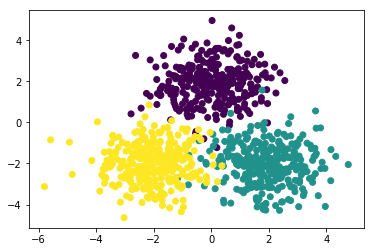

In [25]:
covm = [[1, 0], [0, 1]] 
X = np.concatenate((np.random.multivariate_normal(mean = [0, 2], cov=covm, size = 300),
                   np.random.multivariate_normal(mean = [2,-2], cov=covm, size =300),
                   np.random.multivariate_normal(mean = [-2, -2], cov=covm, size =300)))
y = np.zeros(900)
y[300:600] = 1
y[600:900] = 2
plt.scatter(X[:,0], X[:,1], c=y)

In [26]:
Y = pd.Series(y)
Y = pd.get_dummies(Y).as_matrix()


/Users/FrankWang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## Part 4

In [32]:
ReLu = np.vectorize(lambda z: np.fmax(0,z))
softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]
def predict(Y_hat):
    return np.argmax(Y_hat, axis=1)

In [33]:
def loss(y, y_hat):
    tot = y * np.log(y_hat)
    return -tot.sum()
def forward(X,parameters):
    # Unpacking parameters    
    W1,b1,W2,b2,W3,b3 = parameters
    # Forward pass
    a1 = np.dot(X,W1.T) +b1.T
    H1 = ReLu(a1)
    a2 = np.dot(H1,W2.T) + b2.T
    H2 = ReLu(a2)
    a3 = np.dot(H2,W3.T) + b3.T
    Y_hat = softmax(a3)
    return H1,H2,Y_hat

In [34]:
def grad_descent(x, y, parameters, iterations=10, learning_rate=1e-2):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(X,point)[2])]
    
    for i in range(iterations):
        H1,H2,Y_hat = forward(x,point)
        grad = grad_f(x,H1,H2, y,Y_hat,point)
        point = np.subtract(point, [i*learning_rate for i in grad])
        trajectory.append(point)
        losses.append(loss(y,forward(X,point)[2]))
    return (np.array(trajectory), losses)

In [35]:
W1 = np.array([[1,0],[-1,0],[0,.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
W3 = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
b3 = np.array([[1],[0],[0]])
parameters = [W1,b1,W2,b2,W3,b3]

Text(0.5,0,'Iteration')

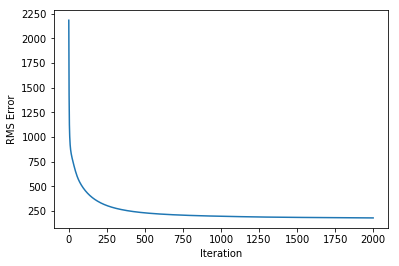

In [40]:
traj, losses = grad_descent(X,Y,parameters,iterations=2000,learning_rate=0.0001)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

Text(0.5,0,'Iteration')

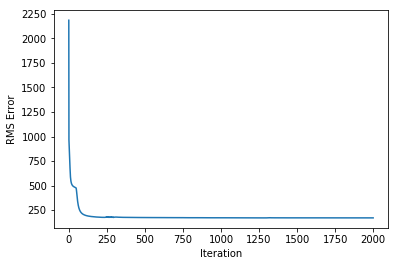

In [41]:
traj, losses = grad_descent(X,Y,parameters,iterations=2000,learning_rate=0.001)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

## Part 5

In [42]:
def grad_descent_with_momentum(x, y, parameters, iterations=10, alpha=.9, epsilon=10):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(X,point)[2])]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        H1,H2,Y_hat = forward(x,point)
        grad = grad_f(x,H1,H2, y,Y_hat,point)
        #v = alpha*v + epsilon*grad
        v = np.add([alpha*i for i in v], [i*epsilon for i in grad])
        point = point - v
        trajectory.append(point)
        losses.append(loss(y,forward(X,point)[2]))
    return (np.array(trajectory), losses)

In [50]:
traj, losses = grad_descent_with_momentum(X,Y,parameters,iterations=2000,alpha=.5,epsilon = 0.0001)

Text(0.5,0,'Iteration')

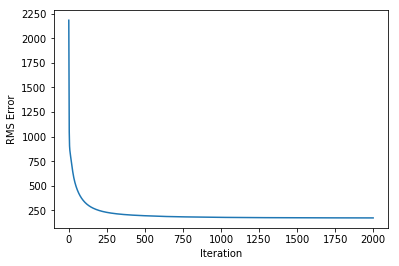

In [51]:
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

Both gradient descent and Momentum gradient descent have similar rate of convergence. But tuning parameters are important because smaller tuning parameter (learning rate in gradient descent and epsilon in Momentum gradient descent) will have a smaller step at each iteration and have a slower rate of convergence. However, if the tuning parameter is very large, it will skip the optimal point and become not stable. For example in the following plot, I change learning rate to 0.1 in gradient descent. 

Text(0.5,0,'Iteration')

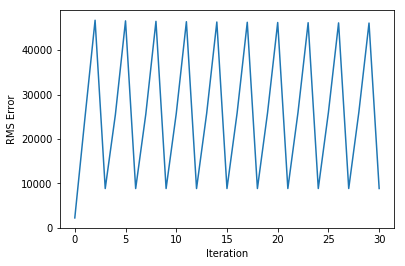

In [49]:
traj, losses = grad_descent(X,Y,parameters,iterations=30,learning_rate=0.1)
plt.plot(losses)
plt.ylabel("RMS Error")
plt.xlabel("Iteration")

In the plot above, because learning rate is too large, it skipped the optimal point at each iteration and error is jumping around at each iteration. Hence, it is very important to choose a good tunning parameter